<a href="https://colab.research.google.com/github/Muhammadyusuf2580/MachineLearning/blob/main/SupportVektorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# 1. Synthetic dataset yaratamiz: telefon turlari
np.random.seed(42)
num_samples = 100

In [3]:
# Xususiyatlar: RAM (GB) va Kamera MP
ram = np.random.randint(2, 13, num_samples)
camera = np.random.randint(5, 108, num_samples)

In [4]:
# Maqsad: Agar RAM >= 8 yoki Kamera >= 48 bo‘lsa => Flagman (1), aks holda => Oddiy (0)
labels = np.where((ram >= 8) | (camera >= 48), 1, 0)

In [5]:
# Matritsaga o'tkazish
X = np.column_stack((ram, camera))
y = labels


In [6]:
# 2. Train / Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# 3. SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# 4. Bashorat va baholash
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [9]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.93
Confusion Matrix:
[[ 3  1]
 [ 1 25]]


<ipython-input-10-34c7554e6a06>:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=50, edgecolors='k', marker='x')


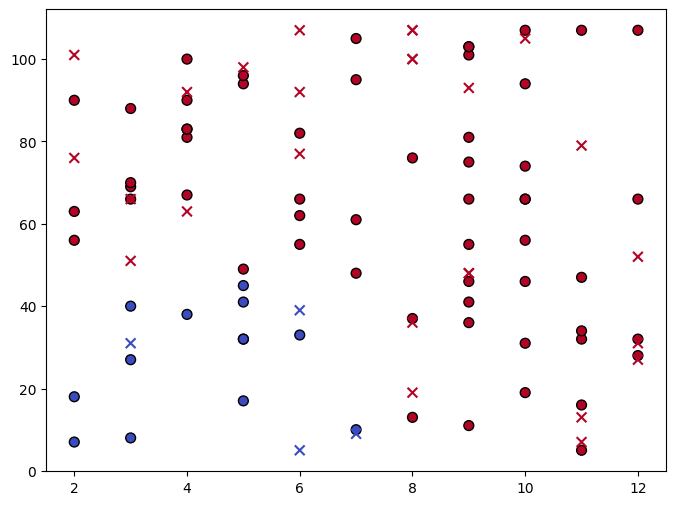

In [10]:
# 5. Decision boundary chizish
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50, edgecolors='k', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=50, edgecolors='k', marker='x')


In [11]:
# Meshgrid
h = .1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

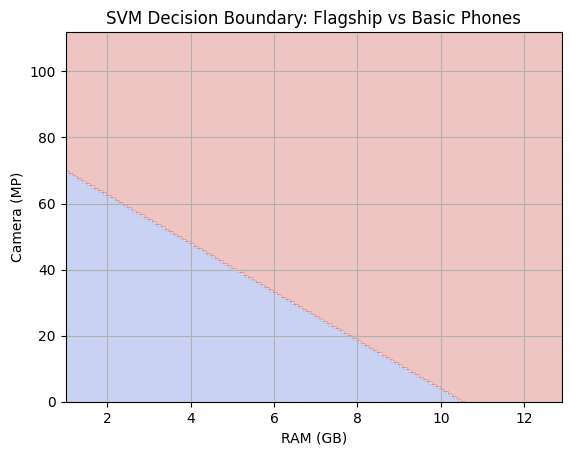

In [12]:
# Decision boundary chizish
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title('SVM Decision Boundary: Flagship vs Basic Phones')
plt.xlabel('RAM (GB)')
plt.ylabel('Camera (MP)')
plt.grid(True)
plt.show()

<ipython-input-13-a46b10de11f2>:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=50, edgecolors='k', marker='x')


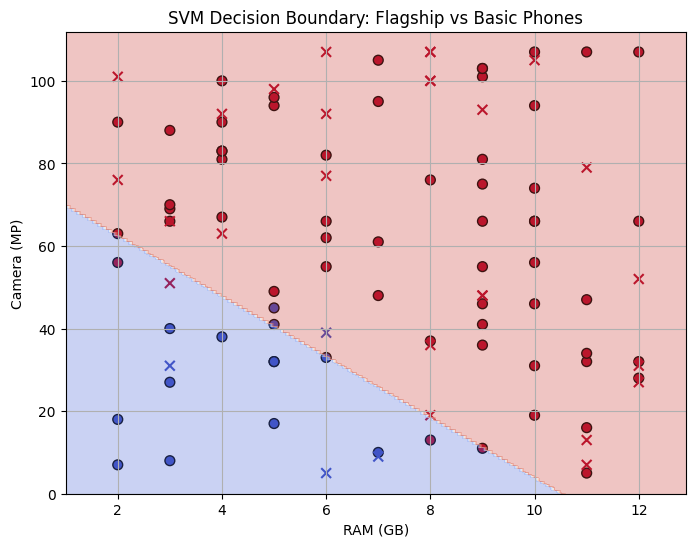

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50, edgecolors='k', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=50, edgecolors='k', marker='x')


plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title('SVM Decision Boundary: Flagship vs Basic Phones')
plt.xlabel('RAM (GB)')
plt.ylabel('Camera (MP)')
plt.grid(True)
plt.show()